# L1.4 Model Evaluation
## Study Case: Boston House Pricing

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score, RepeatedKFold


## 1. Business/Problem Understanding
The Boston House Pricing is a dataset widely used for the comparison of various predictive models. The dataset was originally published by Harrison, D. and Rubinfeld, D.L. "Hedonic prices and the demand for clean air", J. Environ. Economics & Management, vol.5, 81-102, 1978 [[1](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)].

It is composed of 506 instances with 13 input variables.

* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per \$10,000
* PTRATIO  pupil-teacher ratio by town
* B        $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV     Median value of owner-occupied homes in \$1000's

The main tasks for which this dataset has been used are the prediction of Nitrous Oxide levels and house prices. In this study case, the goal will be to predict the median value of a house ina particular area.

This is one of the built-in datasets that scikit-learn comes with, so it is very easy to load data into memory:

In [2]:
# Loading Dataset
boston_raw = load_boston()

The `boston_raw`object contains several attributes like: data, target, feature_names, DESCR and filename.

In [3]:
# Keys
boston_raw.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# Dataset Description
print(boston_raw.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Creating boston_data, boston_target
boston_dataframe = pd.DataFrame(boston_raw.data, columns = boston_raw.feature_names)
boston_dataframe['MEDV'] = boston_raw.target
boston_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 2. Data Exploration

In [6]:
# Statistical Description
boston_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [7]:
# Missing Value
boston_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
na_perc = boston_dataframe.isnull().sum() / len(boston_dataframe)
for label, perc in na_perc.iteritems():
    print("{:6.2%}".format(perc), label)

 0.00% CRIM
 0.00% ZN
 0.00% INDUS
 0.00% CHAS
 0.00% NOX
 0.00% RM
 0.00% AGE
 0.00% DIS
 0.00% RAD
 0.00% TAX
 0.00% PTRATIO
 0.00% B
 0.00% LSTAT
 0.00% MEDV


In [ ]:
# Analisis univariado, checamos el comportamiento de una caracteristica,en esta caso checamos la variable objetivo o target
# ver si con el histograma hay alguna parte de outliers para posteriomente darle algun tratamiento al 
# al respecto

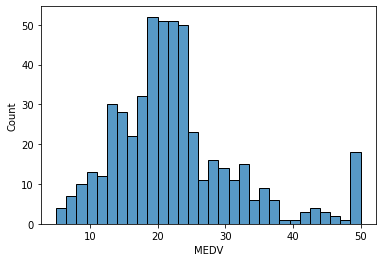

In [9]:
sns.histplot(boston_dataframe['MEDV'], bins=30)
plt.show()

In [10]:
# Matrix Correlation
corr_matrix = boston_dataframe.corr()

In [11]:
corr_matrix.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


In [12]:
corr_matrix["MEDV"].sort_values(ascending = False, key=lambda x: np.abs(x))

MEDV       1.000000
LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [ ]:
# Analisis multivariado, checamos el comportamiento de cada caracteristica, ver si con el 
# histograma hay alguna parte de outliers para posteriomente darle algun tratamiento al 
# al respecto

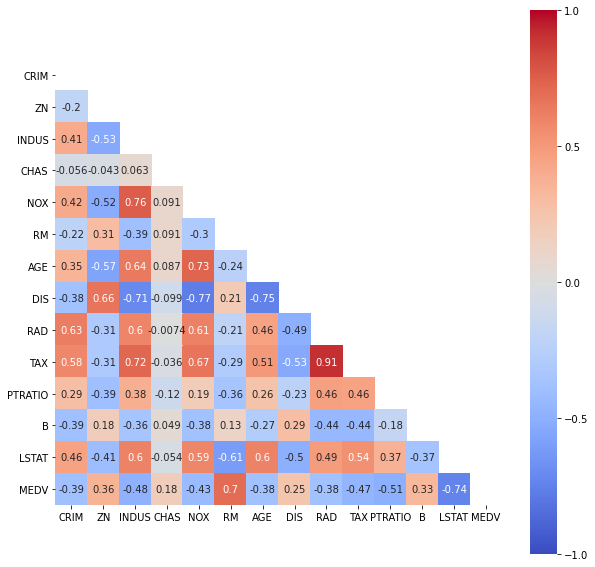

In [13]:
# Mark to Hide Upper Triangle
mask = np.zeros_like(corr_matrix, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Correlation Heatmap

fig, ax = plt.subplots(figsize = (10,10))

heatmap = sns.heatmap(corr_matrix,
                     mask = mask,
                     square = True,
                     cmap = "coolwarm",
                      cbar_kws = {"ticks" : [-1, -0.5, 0, 0.5, 1]},
                     vmin = -1,
                     vmax = 1,
                     annot = True,
                     annot_kws = {"size": 10})

plt.show()

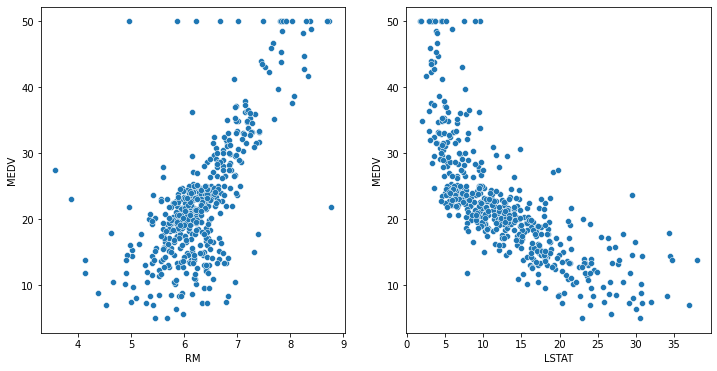

In [14]:
fig, ax = plt.subplots(1,2, figsize = (12,6)) 
sns.scatterplot(x = "RM", y = "MEDV", data = boston_dataframe, ax = ax[0])
sns.scatterplot(x = "LSTAT", y = "MEDV", data = boston_dataframe, ax = ax[1])
plt.show()

## 3. Data Preparation

In [15]:
# Standardize features (input variables) by removing the mean and scaling to unit variance
scaler = StandardScaler()
boston_dataframe[boston_raw.feature_names] = scaler.fit_transform(boston_dataframe[boston_raw.feature_names])

In [16]:
boston_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [17]:
boston_data = boston_dataframe[boston_raw.feature_names]
boston_target = boston_dataframe["MEDV"]

In [18]:
boston_data.shape

(506, 13)

In [19]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [21]:
type(boston_dataframe)

pandas.core.frame.DataFrame

In [19]:
type(boston_data)

pandas.core.frame.DataFrame

In [20]:
type(boston_target)

pandas.core.series.Series

In [20]:
# Train and Test Set
data_train, data_test, target_train, target_test = train_test_split(boston_data,
                                                    boston_target,
                                                   test_size = 0.20,
                                                   random_state = 0)

In [21]:
data_train.shape

(404, 13)

In [22]:
data_test.shape

(102, 13)

In [23]:
target_train.shape

(404,)

In [24]:
target_test.shape

(102,)

In [25]:
print("Train:", data_train.shape, target_train.shape)
print("Test: ", data_test.shape, target_test.shape)

Train: (404, 13) (404,)
Test:  (102, 13) (102,)


### Feature Selection (Filter) 

In [26]:
# Univariate Feature Selection
# https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection
feature_selector = SelectKBest(score_func=f_regression, k=8)
feature_selector.fit(data_train, target_train)

SelectKBest(k=8, score_func=<function f_regression at 0x000002949E0743A8>)

In [27]:
data_train_filtered = feature_selector.transform(data_train)
data_test_filtered = feature_selector.transform(data_test)

In [28]:
print("Train Original:    ", data_train.shape)
print("Test Original:     ", data_test.shape)
print("Train Transformado:", data_train_filtered.shape)
print("Test Transformado: ", data_test_filtered.shape)

Train Original:     (404, 13)
Test Original:      (102, 13)
Train Transformado: (404, 8)
Test Transformado:  (102, 8)


In [29]:
feature_selector.scores_

array([ 81.77212064,  81.1475855 , 153.00493431,  13.09583263,
       107.63575126, 397.33191725,  82.83387891,  34.46704936,
        88.68548609, 142.08609712, 187.10308463,  57.67850087,
       535.13194094])

In [33]:
for i in range(len(feature_selector.scores_)):
    print("{:7s}: {:10f}".format(boston_dataframe.columns[i], feature_selector.scores_[i]))

CRIM   :  81.772121
ZN     :  81.147585
INDUS  : 153.004934
CHAS   :  13.095833
NOX    : 107.635751
RM     : 397.331917
AGE    :  82.833879
DIS    :  34.467049
RAD    :  88.685486
TAX    : 142.086097
PTRATIO: 187.103085
B      :  57.678501
LSTAT  : 535.131941


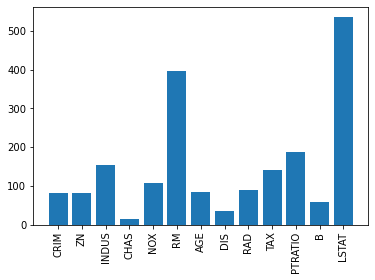

In [34]:
# Gráfica de barras con el nombre de las características y la calificación obtenida
plt.bar([boston_dataframe.columns[i] for i in range(len(feature_selector.scores_))], feature_selector.scores_)
plt.xticks(rotation=90)
plt.show()

### RFE


In [35]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)
rfe.fit(data_train, target_train)

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [36]:
data_train_rfe = rfe.transform(data_train)
data_test_rfe = rfe.transform(data_test)

In [37]:
print("Train Original:    ", data_train.shape)
print("Test Original:     ", data_test.shape)
print("Train Transformado:", data_train_rfe.shape)
print("Test Transformado: ", data_test_rfe.shape)

Train Original:     (404, 13)
Test Original:      (102, 13)
Train Transformado: (404, 8)
Test Transformado:  (102, 8)


In [38]:
rfe.ranking_

array([1, 2, 6, 4, 1, 1, 5, 1, 1, 1, 1, 3, 1])

In [39]:
# Iterando por sobre todas las características e imprimiendo la clasificación correspondiente
for i in range(len(rfe.ranking_)):
    print("{:7s}: {:3d}".format(boston_dataframe.columns[i], rfe.ranking_[i]))

CRIM   :   1
ZN     :   2
INDUS  :   6
CHAS   :   4
NOX    :   1
RM     :   1
AGE    :   5
DIS    :   1
RAD    :   1
TAX    :   1
PTRATIO:   1
B      :   3
LSTAT  :   1


## 4. Model Prediction

In [40]:
# 1. Model Creation
linear_regression = LinearRegression()

# 2. Model Fit
linear_regression.fit(data_train, target_train)

LinearRegression()

In [41]:
# w0, w1, etc son los coeficientes B0, B1, etc
intercept = linear_regression.intercept_
coefficients = linear_regression.coef_

print("w0 = {:5.2f}".format(intercept))

for i in range(1,len(coefficients) + 1):
    print("w{:d} = {:5.2f}".format(i, coefficients[i-1]))

w0 = 22.48
w1 = -1.03
w2 =  1.04
w3 =  0.04
w4 =  0.59
w5 = -1.87
w6 =  2.60
w7 = -0.09
w8 = -2.92
w9 =  2.12
w10 = -1.85
w11 = -2.26
w12 =  0.74
w13 = -3.52


In [42]:
# 3. Model Prediction
y_pred = linear_regression.predict(data_test)

In [44]:
# Mean Square Error

# 1. MSE Equation
MSE_formula = np.mean(((y_pred - target_test)**2))

# 2. MSE Sklearn
MSE_sklearn = mean_squared_error(target_test, y_pred)

# 3. RMSE
RMSE = np.sqrt(MSE_sklearn)

# 4. R2
R2_sklearn = r2_score(target_test, y_pred)

# 5. R2 Model
R2_model = linear_regression.score(data_test, target_test)

Root mean squared error corresponds approximately to an estimate of the standard deviation. Since most data is at most two standard deviations from the mean, we can double our RMSE to obtain a rough confident interval. This is only completely valid if the errors are normally distributed, but it is often roughly correct even if they are not (Coelho et al, 2018)

In [47]:
print("MSE_formula = {:.3f}".format(MSE_formula))
print("MSE_sklearn = {:.3f}".format(MSE_sklearn))
print("RMSE_sklearn = {:.3f}".format(RMSE))

MSE_formula = 33.449
MSE_sklearn = 33.449
RMSE_sklearn = 5.784


In our case, we can expect the estimated price to be different from the real price by, at most, 11,600 dollars.

In [48]:
print("R2_sklearn= {:.3f}".format(R2_sklearn))
print("R2_model= {:.3f}".format(R2_model))

R2_sklearn= 0.589
R2_model= 0.589


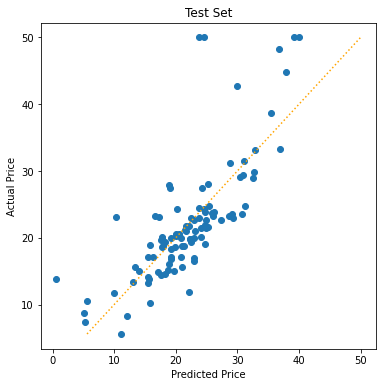

In [51]:
# Prediction vs Actual Value
fig, ax = plt.subplots(figsize = (6,6)) 
ax.set_title("Test Set")
ax.scatter(y_pred, target_test)
ax.set_xlabel("Predicted Price")
ax.set_ylabel("Actual Price")
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], ":", color = 'orange')
plt.show()

In [53]:
# KFold Object Creation
kf = KFold(n_splits=5)

# KFold Prediction
boston_target_prediction = cross_val_predict(linear_regression,
                                             boston_data,
                                             boston_target, 
                                             cv = kf)
# RMSE
rmse_cv = np.sqrt(mean_squared_error(boston_target_prediction, boston_target))
print("RMSE on 5-fold Cross Validation: {:.2f}".format(rmse_cv))

RMSE on 5-fold Cross Validation: 6.09


In [54]:
mae_score = -cross_val_score(linear_regression, 
                             boston_data, 
                             boston_target, 
                             scoring='neg_mean_absolute_error', 
                             cv=10)

rmse_score = -cross_val_score(linear_regression, 
                              boston_data, 
                              boston_target, 
                              scoring='neg_root_mean_squared_error', 
                              cv=10)

In [55]:
mae_score

array([2.20686845, 2.89680909, 2.78673044, 4.59847835, 4.10986504,
       3.56469238, 2.66966723, 9.65637767, 5.02272517, 2.53725254])

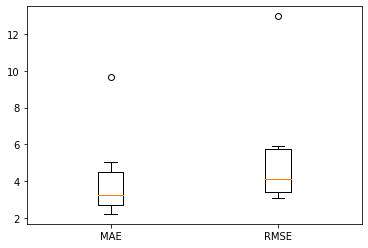

In [56]:
plt.boxplot([mae_score, rmse_score], labels=["MAE", "RMSE"])
plt.show()

In [57]:
mae_scores = []
rmse_scores = []
for repeat in range(1,16):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeat, random_state=1)
    mae_score = cross_val_score(linear_regression, 
                                boston_data, 
                                boston_target, 
                                scoring='neg_mean_absolute_error', 
                                cv=cv)
    
    rmse_score = cross_val_score(linear_regression, 
                                 boston_data, 
                                 boston_target, 
                                 scoring='neg_root_mean_squared_error', 
                                 cv=cv)

    mae_scores.append(-mae_score)
    rmse_scores.append(-rmse_score)

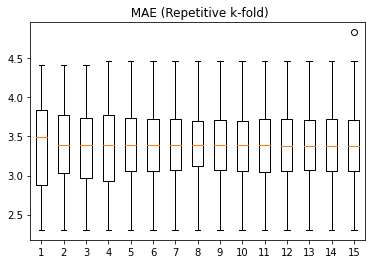

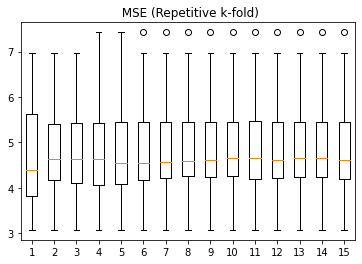

In [58]:
plt.boxplot(mae_scores)
plt.title(" MAE (Repetitive k-fold)")
plt.show()

plt.boxplot(rmse_scores)
plt.title(" MSE (Repetitive k-fold)")
plt.show()

## References:

* Brownlee J. (2020) _**Data Preparation for Machine Learning:** Data Cleaning, Feature Selection, and Data Transforms in Python_.
* Coelho L. P. et al (2018) _Building Machine Learning Systems with Python_.